The name of this algorithm is heart attack predictor.In this algorithm we provide features of human body such as cholestrol levels, age,sex , etc., 13 features as input and then the algorithm predicts whether a person will have a heart attack or not.The outputs are the Binary Predictors i.e, 0 or 1.1 means that the person will have a heart attack and 0 means he won't.

# Importing the relevant libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Importing the Dataset

In [88]:
cd/Users/lenovo/Desktop/datascience

C:\Users\lenovo\Desktop\datascience


In [89]:
raw_data=pd.read_csv('heart.csv')
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now , for analyzing the data we consider the values of mean, count etc.

In [90]:
raw_data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Now we plot few of these features, with target to get an idea of the type of model we can use.

<function matplotlib.pyplot.show(*args, **kw)>

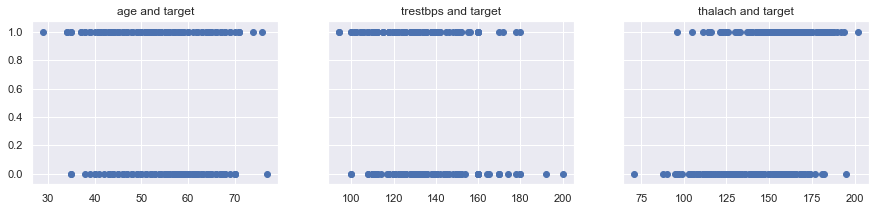

In [91]:
f,(ax1,ax2,ax3)= plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(raw_data['age'], raw_data['target'])
ax1.set_title('age and target')
ax2.scatter(raw_data['trestbps'],raw_data['target'])
ax2.set_title('trestbps and target')
ax3.scatter(raw_data['thalach'],raw_data['target'])
ax3.set_title('thalach and target')

plt.show

As we can see from the plots, the plots obtained , do not look like the proper plot of a Logistic Regression. (We are considering Logistic Regression as an option because the output in this case has binary predictors.) Next we find the multicollinearity to check if we can still apply Logistic Regression.
NOTE: we find multicollinearity for only the continous data.

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=raw_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak'   ] ]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features']= variables.columns

In [93]:
vif

,VIF,features
0,36.410374,age
1,55.751559,trestbps
2,24.228662,chol
3,29.378507,thalach
4,2.093841,oldpeak


As the multicollinearity for most features is more than 5, Logistic Regression is not a good option.

# Defining inputs and targets

In [94]:
inputs=raw_data.drop(['target'], axis=1)
targets=raw_data['target']

# Train-test split

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(inputs, targets, test_size=0.16, random_state=101)

Now as we will use model SVC, we import the relevant libraries

In [96]:
from sklearn.svm import SVC

# Importing classification report, confusion matrix

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
svc_model=SVC()

# Fitting the model

In [99]:
svc_model.fit(x_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [100]:
y_predict=svc_model.predict(x_test)

In [101]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [102]:
confusion_matrix(y_test, y_predict)

array([[ 0, 21],
       [ 0, 28]], dtype=int64)

As the results are not satisfactory, we first standardize the data.

# STANDARDIZATION

In [103]:
unscaled_inputs=inputs.copy()

In [104]:
unscaled_inputs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [105]:
from sklearn.preprocessing import StandardScaler
heart_scaler=StandardScaler()

In [106]:
heart_scaler.fit(unscaled_inputs)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [107]:
scaled_inputs=heart_scaler.transform(unscaled_inputs)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [108]:
scaled_inputs

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# Splitting

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
scaled_inputs_train, scaled_inputs_test, y_train,y_test=train_test_split(scaled_inputs,targets, test_size=0.25, random_state=42)

# Fitting the model

In [111]:
from sklearn.svm import SVC

In [112]:
svc_model=SVC()

In [113]:
svc_model.fit(scaled_inputs_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [114]:
y_predict=svc_model.predict(scaled_inputs_test)

In [115]:
y_predict

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [116]:
cm=confusion_matrix(y_test, y_predict)

# HEATMAP

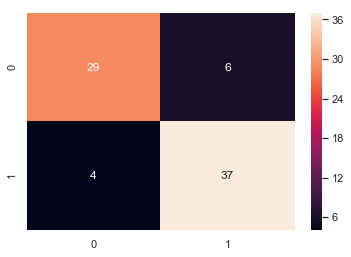

In [128]:
sns.heatmap(cm, annot=True)

In [118]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

   micro avg       0.88      0.88      0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



# Improving the model

We vary the C and gamma values to improve our model

In [119]:
param_grid={'C':[0.1, 1, 10, 100], 'gamma': [1,0.1, 0.01, 0.001], 'kernel':['rbf']}

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
grid= GridSearchCV(SVC(), param_grid, refit=True, verbose=4 )

In [123]:
grid.fit(scaled_inputs_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5454545454545454, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5466666666666666, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5466666666666666, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7532467532467533, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6933333333333334, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.72, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf .................................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [124]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [125]:
grid_predictions=grid.predict(scaled_inputs_test)

In [126]:
cm=confusion_matrix(y_test,grid_predictions)

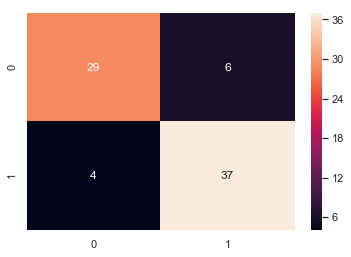

In [127]:
sns.heatmap(cm, annot=True)

In [129]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

   micro avg       0.87      0.87      0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76

